In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
dataset['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
dataset['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [7]:
X  = dataset['data']
X.shape

(442, 10)

In [8]:
y = dataset['target']
y.shape

(442,)

In [9]:
print(dataset['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# creating data frame 

In [10]:
data = pd.DataFrame(dataset.data, 
                   columns=dataset.feature_names)

In [11]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
data['Result'] = dataset.target

In [15]:
data.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Resukt,Result
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,135.0


# perform dtaa splitting 

In [20]:
data = data.drop(['Resukt'], axis = 1)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'])

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


fitting the model

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))

0.5294619440722965


In [25]:
print(lr.score(X_test, y_test))

0.4706023317925962


# prediction 

In [26]:
y_pred = lr.predict(X_test)

In [27]:
y_test

array([150., 346., 132., 202., 310., 273., 172., 121.,  66.,  75., 109.,
        94.,  67., 341., 170., 178.,  25.,  65., 170.,  85., 128., 181.,
       134., 154.,  77.,  95.,  60., 122.,  95., 147., 249.,  71., 132.,
       122., 311., 246., 202., 242.,  60., 274., 198., 257.,  42., 150.,
        84., 121., 220., 242.,  59.,  63., 262., 277., 126., 281., 243.,
       129.,  68., 110.,  44., 220., 200.,  70.,  88., 199., 236., 233.,
       158., 131.,  49., 135., 185.,  96.,  83.,  99., 186.,  68.,  51.,
       225.,  61., 161., 245., 265., 198., 281.,  84., 233., 245., 150.,
       102., 173.,  53., 259., 141.,  87.,  57., 275., 268., 200., 103.,
       131.,  91.,  58.,  78., 120., 261., 210., 141.,  92., 103., 242.,
        50.])

In [28]:
y_pred

array([210.52538086, 267.16924012, 260.31324715, 193.22970433,
       219.64121679, 272.09226416, 143.76149223, 217.79496675,
       121.92172636,  77.59252928, 174.99521058, 104.67991252,
       192.42942691, 251.02138895,  95.42952149, 169.74845869,
       148.73458012,  55.53730319, 192.17279965, 157.91238125,
       175.25822579,  85.90509949,  74.30737541, 162.47204762,
       172.38407184, 156.04556046, 131.46174194, 174.04701387,
       155.28406425, 176.10107037, 211.73746733,  84.78178721,
       124.32297114, 194.00585257, 174.82821151, 238.99063927,
       220.89748461, 180.68543706, 118.76087898, 247.00794751,
       212.43439946, 185.23044788, 130.72032444, 144.47517541,
        91.20619635, 170.66131028, 215.60123872, 281.79340838,
        74.65313729,  57.89839337, 160.02627645, 265.26649862,
       174.4978623 , 257.58362565, 256.26855448, 192.53234471,
       118.49406479, 163.45466331, 131.02523291, 175.33502743,
        79.18164041,  58.35982188,  92.17028177, 111.56

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [33]:
print(mse)

3309.4171423423563


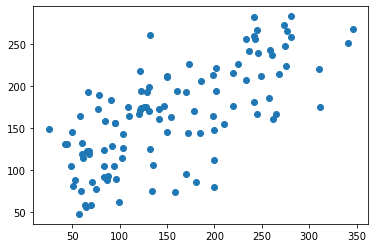

In [39]:
plt.scatter(y_test, y_pred)

plt.show()

# trying some other algorithm to make more accurate 

Decision TRee

In [42]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

1.0
-0.16355558187988506


In [46]:
y_prid = reg.predict(X_train)

In [47]:
y_prid

array([197.,  70., 172., 107., 142., 258., 128.,  49., 208.,  91., 215.,
       321., 140.,  37.,  97.,  65.,  88.,  99., 292., 102., 248., 116.,
        71., 115., 229.,  90.,  83.,  81.,  85., 196., 124., 277.,  52.,
       209., 206., 275.,  74., 258.,  88.,  52., 214.,  94.,  77., 111.,
        81.,  84., 252., 263., 184., 124., 276., 177., 160.,  98., 270.,
       142., 109., 183.,  64.,  64., 113.,  97.,  47., 146., 101., 109.,
       283., 288.,  71., 102., 118.,  97., 214.,  93.,  66., 179.,  53.,
       110.,  55., 200., 232., 173., 136.,  72., 111., 123., 179., 118.,
       230., 258.,  55.,  77., 216., 263.,  39., 101., 295., 158.,  74.,
       143., 257.,  42., 198., 104.,  55.,  45., 181., 162., 296., 302.,
       168.,  93.,  89.,  55., 336.,  78.,  64., 279.,  69.,  51., 220.,
        48., 139., 160., 244., 281.,  83., 200.,  71., 138., 293., 140.,
       163.,  42., 142.,  59., 134., 280.,  40., 275., 115.,  91., 182.,
       219., 151., 200.,  85., 303.,  90., 197.,  5

In [48]:
y_train

array([197.,  70., 172., 107., 142., 258., 128.,  49., 208.,  91., 215.,
       321., 140.,  37.,  97.,  65.,  88.,  99., 292., 102., 248., 116.,
        71., 115., 229.,  90.,  83.,  81.,  85., 196., 124., 277.,  52.,
       209., 206., 275.,  74., 258.,  88.,  52., 214.,  94.,  77., 111.,
        81.,  84., 252., 263., 184., 124., 276., 177., 160.,  98., 270.,
       142., 109., 183.,  64.,  64., 113.,  97.,  47., 146., 101., 109.,
       283., 288.,  71., 102., 118.,  97., 214.,  93.,  66., 179.,  53.,
       110.,  55., 200., 232., 173., 136.,  72., 111., 123., 179., 118.,
       230., 258.,  55.,  77., 216., 263.,  39., 101., 295., 158.,  74.,
       143., 257.,  42., 198., 104.,  55.,  45., 181., 162., 296., 302.,
       168.,  93.,  89.,  55., 336.,  78.,  64., 279.,  69.,  51., 220.,
        48., 139., 160., 244., 281.,  83., 200.,  71., 138., 293., 140.,
       163.,  42., 142.,  59., 134., 280.,  40., 275., 115.,  91., 182.,
       219., 151., 200.,  85., 303.,  90., 197.,  5

# Random Forest ALgorithm

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.3935235603035885

In [54]:
rf.score(X_train, y_train)

0.9249755988707358